In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
import seaborn as sb
import pygmnormalize as gmn
from scipy.cluster import hierarchy
from scipy.stats import variation
from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Load Data

In [2]:
# 325 patients; expression data and clinical data
gene_data = pd.read_csv('data/study_1/expression_data.csv')
clinical_data = pd.read_csv('data/study_1/clinical_data.csv')

In [3]:
gene_data

,Gene_Name,CGGA_1001,CGGA_1006,CGGA_1007,CGGA_1011,CGGA_1015,CGGA_1019,CGGA_1022,CGGA_1023,CGGA_1024,...,CGGA_1246,CGGA_1275,CGGA_1450,CGGA_1460,CGGA_1475,CGGA_243,CGGA_247,CGGA_738,CGGA_759,CGGA_D30
0,A1BG,12.64,7.03,30.09,6.64,1.83,39.03,12.96,9.28,2.35,...,4.46,28.42,19.32,2.24,18.89,4.03,5.29,4.64,7.07,31.41
1,A1BG-AS1,2.12,1.13,6.64,4.32,1.39,4.46,3.25,1.90,1.22,...,1.57,8.36,2.21,1.60,5.31,2.47,3.69,0.85,1.99,2.65
2,A2M,452.92,106.54,206.70,707.17,824.32,155.14,538.33,26.39,219.35,...,87.20,243.89,73.80,111.50,340.53,108.06,97.24,160.70,263.66,192.54
3,A2M-AS1,3.30,0.13,0.63,1.61,1.34,3.08,0.72,1.96,1.48,...,0.42,1.02,0.22,0.15,0.91,0.33,0.03,0.38,0.48,2.51
4,A2ML1,0.04,0.33,4.96,1.59,0.00,0.10,0.39,2.34,0.68,...,2.58,0.55,0.15,1.75,0.05,1.55,0.71,3.33,0.60,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,ZYG11A,0.02,0.49,0.21,0.04,0.02,0.02,0.00,0.02,0.00,...,0.01,0.04,0.00,0.04,0.03,0.00,0.25,0.53,0.00,0.02
24322,ZYG11B,3.81,7.84,8.09,5.68,7.04,3.73,9.42,1.79,7.66,...,6.46,3.27,4.43,7.43,7.30,10.26,8.81,9.91,7.53,7.49
24323,ZYX,158.36,761.56,92.85,158.75,380.73,374.88,115.05,117.83,147.99,...,26.78,301.38,60.35,243.20,112.77,21.45,67.38,72.42,86.75,85.42
24324,ZZEF1,6.56,5.86,9.78,11.48,11.71,7.42,7.40,9.56,5.79,...,11.93,4.53,8.97,10.09,9.98,14.00,17.09,15.13,12.51,4.20


### Sample Data Samples - Expression

In [4]:
gene_data.head()

,Gene_Name,CGGA_1001,CGGA_1006,CGGA_1007,CGGA_1011,CGGA_1015,CGGA_1019,CGGA_1022,CGGA_1023,CGGA_1024,...,CGGA_1246,CGGA_1275,CGGA_1450,CGGA_1460,CGGA_1475,CGGA_243,CGGA_247,CGGA_738,CGGA_759,CGGA_D30
0,A1BG,12.64,7.03,30.09,6.64,1.83,39.03,12.96,9.28,2.35,...,4.46,28.42,19.32,2.24,18.89,4.03,5.29,4.64,7.07,31.41
1,A1BG-AS1,2.12,1.13,6.64,4.32,1.39,4.46,3.25,1.90,1.22,...,1.57,8.36,2.21,1.60,5.31,2.47,3.69,0.85,1.99,2.65
2,A2M,452.92,106.54,206.70,707.17,824.32,155.14,538.33,26.39,219.35,...,87.20,243.89,73.80,111.50,340.53,108.06,97.24,160.70,263.66,192.54
3,A2M-AS1,3.30,0.13,0.63,1.61,1.34,3.08,0.72,1.96,1.48,...,0.42,1.02,0.22,0.15,0.91,0.33,0.03,0.38,0.48,2.51
4,A2ML1,0.04,0.33,4.96,1.59,0.00,0.10,0.39,2.34,0.68,...,2.58,0.55,0.15,1.75,0.05,1.55,0.71,3.33,0.60,3.86


### Sample Data Samples - Clinical

In [5]:
clinical_data.head()

,CGGA_ID,PRS_type,Histology,Grade,Gender,Age,OS,Censor,Radio_status,Chemo_status,IDH_mutation_status,1p19q_codeletion_status
0,CGGA_1001,Primary,GBM,WHO IV,Male,11,3428.0,0.0,0.0,1.0,Wildtype,Non-codel
1,CGGA_1006,Primary,AA,WHO III,Male,42,254.0,1.0,1.0,1.0,Wildtype,Non-codel
2,CGGA_1007,Primary,GBM,WHO IV,Female,57,345.0,1.0,1.0,1.0,Wildtype,Non-codel
3,CGGA_1011,Primary,GBM,WHO IV,Female,46,109.0,1.0,1.0,0.0,Wildtype,Non-codel
4,CGGA_1015,Primary,GBM,WHO IV,Male,62,164.0,1.0,1.0,0.0,Wildtype,Non-codel


### Data Statistics

In [6]:
print(f'Number of Data Samples: {len(gene_data.columns)-1}')
print(f'Number of Genes: {len(gene_data.index)}')

Number of Data Samples: 325
Number of Genes: 24326


The original data set consists of 325 data samples with 24000+ genes.

## Data Preprocessing

- Impute the class labels (tumor grade) and histology data as some of the values are 'NaN'
- Impute using the most frequent value in the column

In [9]:
class_label_col = ['Grade']
histology_col = ['Histology']
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
class_labels = imputer.fit_transform(clinical_data[class_label_col])
histology = imputer.fit_transform(clinical_data[histology_col])
class_labels_categories = list(np.unique(class_labels))

### Visualize Class Distribution

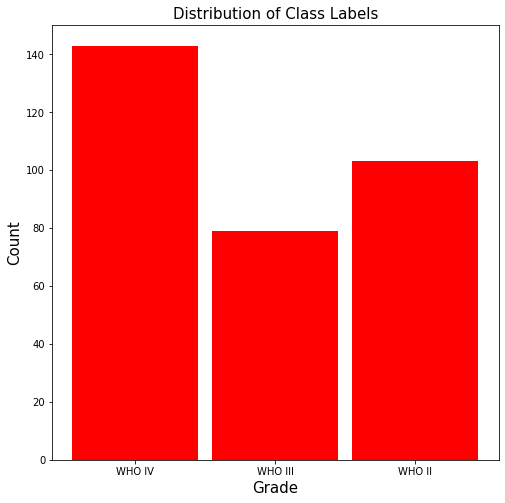

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.hist(class_labels, bins=range(4),  color=['red'], rwidth=0.90, align='left')
ax.set_xlabel('Grade', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title('Distribution of Class Labels', size=15)
plt.show()

In [9]:
unique, counts = np.unique(class_labels, return_counts=True)
print('Counts for labels: ')
for i in range(len(unique)):
    print(f'Class: {unique[i]}, Count: {counts[i]}')

Counts for labels: 
Class: WHO II, Count: 103
Class: WHO III, Count: 79
Class: WHO IV, Count: 143


### Visualize Histology Distribution

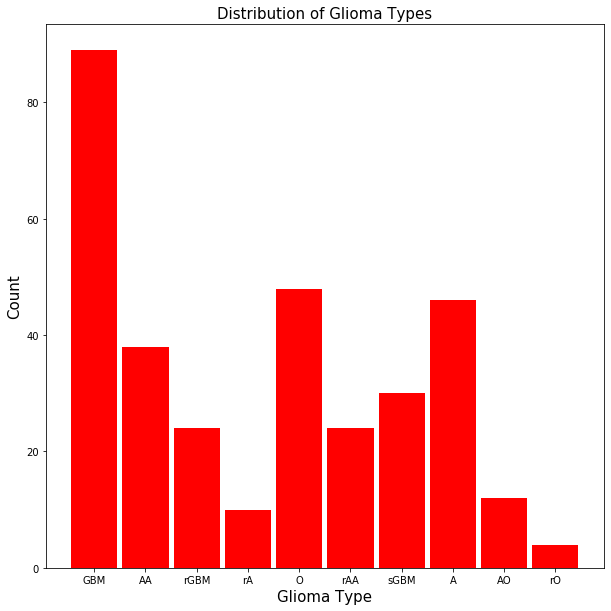

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(histology, bins=range(11),  color=['red'], rwidth=0.90, align='left')
ax.set_xlabel('Glioma Type', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title('Distribution of Glioma Types', size=15)
plt.show()

In [11]:
unique, counts = np.unique(histology, return_counts=True)
print('Counts for glioma types: ')
for i in range(len(unique)):
    print(f'Type: {unique[i]}, Count: {counts[i]}')

Counts for glioma types: 
Type: A, Count: 46
Type: AA, Count: 38
Type: AO, Count: 12
Type: GBM, Count: 89
Type: O, Count: 48
Type: rA, Count: 10
Type: rAA, Count: 24
Type: rGBM, Count: 24
Type: rO, Count: 4
Type: sGBM, Count: 30


### Visualize Read Counts by Sample

In [10]:
# Store the gene_names in a separate column so that we can work on the gene_data matrix directly
gene_names = gene_data['Gene_Name']
gene_data = gene_data.drop(columns=['Gene_Name'])

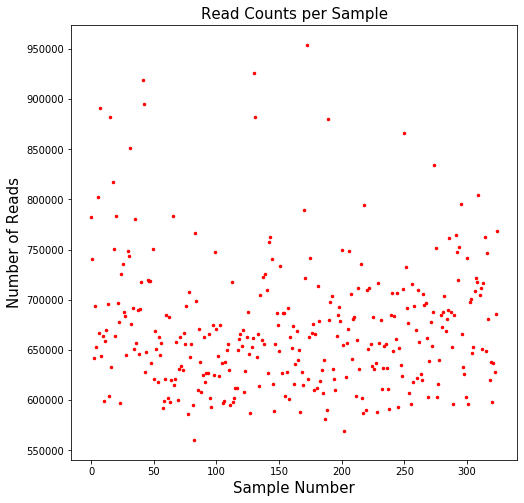

In [39]:
sample_sums = gene_data.sum(axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(range(325), sample_sums, 'r.', markersize=5)
ax.set_xlabel('Sample Number', size=15)
ax.set_ylabel('Number of Reads', size=15)
ax.set_title('Read Counts per Sample', size=15)
plt.show()

### Visualize Read Counts by Gene

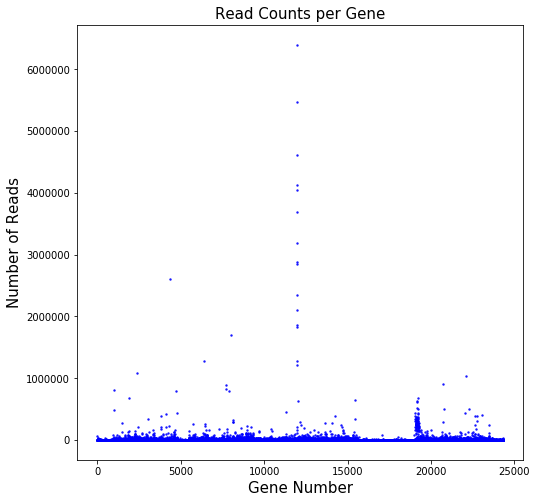

In [14]:
gene_sums = gene_data.sum(axis = 1)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(range(len(gene_sums)), gene_sums, 'b.', alpha = .75, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Number of Reads', size=15)
ax.set_title('Read Counts per Gene', size=15)
plt.show()

## Further data processing

### Train-Test split

In [11]:
# Train-test split 90/10 as this is train/test. 
# We may further split the training data into training and validation data
# stratify=class_labels will make sure that the different classes are equally represented between the training
# and testing data
train_genes, test_genes, train_lbl, test_lbl = train_test_split(gene_data.T, class_labels, 
                                                                test_size=0.10, 
                                                                random_state=0,
                                                                shuffle=True, 
                                                                stratify=class_labels)

### Filter based on read count (i.e. 70% of samples have < 1 count for this gene)

In [12]:
low_exp = []
for i in train_genes.columns:
    count = 0
    for j in train_genes[i]:
        if j < 1: 
            count += 1
    if count/325 >= 0.70:
        low_exp.append(i)

In [13]:
cols_filtered_low_exp = [x for x in train_genes.columns if x not in low_exp]
train_genes = train_genes[cols_filtered_low_exp]

### Sequence Data Normalization
- Both of the methods below seem to be good options for normalizing data when comparing gene expression across different samples (and therefore across different gliomas)
<br/> ***We decided to remove Relative Log Expression and just do TMM***

#### Trimmed Mean of M
- Uses log2 transform on the data as part of the normalization (log ratio) but the final values arent log values
- Will apply log transform after the data is normalized

In [14]:
# Training Data before applying TMM
train_genes.head()

,0,1,2,4,7,9,10,12,13,14,...,24315,24316,24317,24318,24319,24320,24322,24323,24324,24325
CGGA_171,12.66,1.21,188.46,1.14,1.93,25.41,4.26,7.95,3.18,12.23,...,4.43,2.06,3.90,1.57,3.05,2.68,4.59,35.90,3.56,5.64
CGGA_1024,2.35,1.22,219.35,0.68,4.32,25.78,8.05,6.68,6.91,22.71,...,6.84,6.93,18.18,1.43,3.08,9.56,7.66,147.99,5.79,10.36
CGGA_835,7.11,1.73,82.60,3.43,1.36,36.54,3.99,7.10,4.36,10.29,...,4.49,2.18,5.92,2.14,4.49,6.74,5.21,45.83,4.60,4.43
CGGA_738,4.64,0.85,160.70,3.33,2.69,38.59,8.70,8.09,5.38,9.99,...,3.52,2.85,6.89,2.60,3.89,12.87,9.91,72.42,15.13,12.23
CGGA_479,13.11,2.65,133.27,1.14,6.01,27.09,4.40,7.01,3.63,8.20,...,4.04,3.69,3.80,2.48,3.81,11.88,5.88,51.67,11.34,7.31


In [15]:
# Training data after applying TMM
# Expect genes as rows and samples as columns
normalized_tmm_train_genes = gmn.tmm_normalization(train_genes.T).T
normalized_tmm_train_genes.head()

,0,1,2,4,7,9,10,12,13,14,...,24315,24316,24317,24318,24319,24320,24322,24323,24324,24325
CGGA_171,18.586436,1.776429,276.682446,1.673660,2.833477,37.305003,6.254204,11.671577,4.668631,17.955143,...,6.503785,3.024333,5.725679,2.304953,4.477775,3.934569,6.738684,52.705613,5.226518,8.280213
CGGA_1024,2.436149,1.264724,227.391214,0.704928,4.478368,26.725076,8.345107,6.924884,7.163316,23.542532,...,7.090750,7.184049,18.846466,1.482423,3.192911,9.910463,7.940810,153.415208,6.002257,10.739790
CGGA_835,8.503976,2.069181,98.794437,4.102481,1.626640,43.703980,4.772274,8.492016,5.214815,12.307443,...,5.370303,2.607408,7.080667,2.559565,5.370303,8.061435,6.231465,54.815364,5.501869,5.298539
CGGA_738,4.307423,0.789075,149.181639,3.091318,2.497191,35.824017,8.076417,7.510140,4.994382,9.273955,...,3.267700,2.645723,6.396151,2.413642,3.611180,11.947528,9.199689,67.229212,14.045540,11.353400
CGGA_479,16.415838,3.318228,166.875575,1.427464,7.525491,33.921058,5.509511,8.777653,4.545347,10.267725,...,5.058733,4.620476,4.758214,3.105361,4.770736,14.875680,7.362710,64.699189,14.199512,9.153301


In [16]:
gene_indices = list(normalized_tmm_train_genes.columns.values) 

### Log Transformation of data

In [17]:
log_normalized_tmm_train_genes = pd.DataFrame(np.log2(normalized_tmm_train_genes, out=np.zeros_like(normalized_tmm_train_genes), where=(normalized_tmm_train_genes!=0)))
log_normalized_tmm_train_genes.columns = gene_indices
log_normalized_tmm_train_genes.head()

,0,1,2,4,7,9,10,12,13,14,...,24315,24316,24317,24318,24319,24320,24322,24323,24324,24325
0,4.216178,0.828980,8.112087,0.743007,1.502574,5.221297,2.644826,3.544928,2.223000,4.166325,...,2.701279,1.596617,2.517447,1.204737,2.162782,1.976206,2.752467,5.719885,2.385850,3.049668
1,1.284603,0.338823,7.829033,-0.504452,2.162973,4.740122,3.060931,2.791790,2.840628,4.557198,...,2.825938,2.844797,4.236222,0.567957,1.674872,3.308952,2.989286,7.261298,2.585505,3.424894
2,3.088138,1.049060,6.626358,2.036497,0.701895,5.449693,2.254677,3.086107,2.382616,3.621459,...,2.425003,1.382616,2.823885,1.355899,2.425003,3.011037,2.639571,5.776508,2.459922,2.405595
3,2.106825,-0.341765,7.220926,1.628222,1.320306,5.162855,3.013715,2.908840,2.320306,3.213185,...,1.708275,1.403662,2.677204,1.271212,1.852470,3.578640,3.201585,6.071016,3.812040,3.505053
4,4.037017,1.730413,7.382629,0.513455,2.911786,5.084109,2.461924,3.133835,2.184390,3.360045,...,2.338776,2.208042,2.250420,1.634761,2.254212,3.894884,2.880237,6.015676,3.827769,3.194292


#### Visualize Distribution of Counts per Gene after Normalized and Log-transformed

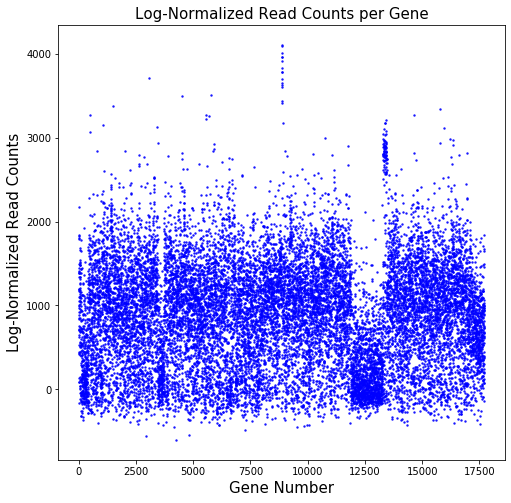

In [14]:
log_norm_sums = log_normalized_tmm_train_genes.sum(axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(range(len(log_norm_sums)), log_norm_sums, 'b.', alpha = .75, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Log-Normalized Read Counts', size=15)
ax.set_title('Log-Normalized Read Counts per Gene', size=15)
plt.show()

### Selecting Features based on Variance

In [18]:
selector = VarianceThreshold(threshold=0.5)
high_var_train_genes = pd.DataFrame(selector.fit_transform(log_normalized_tmm_train_genes))

#### Visualize Variance

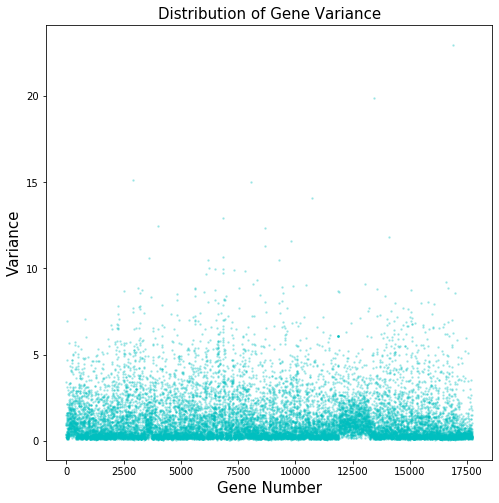

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(selector.variances_, 'c.', alpha=0.25, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Variance', size=15)
ax.set_title('Distribution of Gene Variance', size=15)
plt.show()

#### Close-up of the distribution

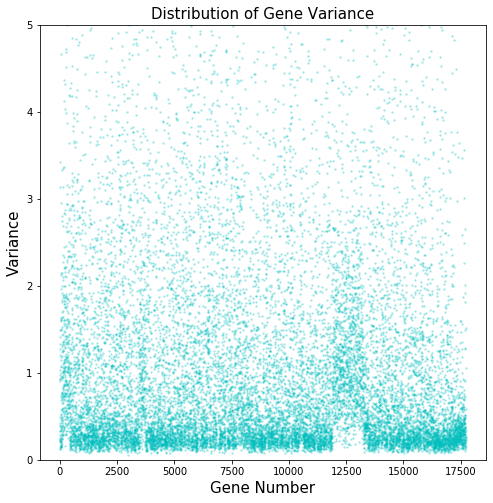

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(selector.variances_, 'c.', alpha=0.25, markersize=3)
ax.set_xlabel('Gene Number', size=15)
ax.set_ylabel('Variance', size=15)
ax.set_ylim(bottom=0, top = 5)
ax.set_title('Distribution of Gene Variance', size=15)
plt.show()

#### Variance Threshold (Remove Low Variance)

In [19]:
## Note: Already fit the VarianceThreshold with the visualizations above

#create a mask of features selected
mask = selector.get_support(indices = True)

#select the same indexes from the header
reduced_header = np.take(gene_indices, mask)

high_var_train_genes.columns = reduced_header

print(f"Filter reduced number of genes by {len(log_normalized_tmm_train_genes.columns) - len(high_var_train_genes.columns)} from {len(log_normalized_tmm_train_genes.columns)} to {len(high_var_train_genes.columns)}")
high_var_train_genes.head()

Filter reduced number of genes by 7781 from 17717 to 9936


,0,1,2,4,7,15,28,31,32,33,...,24285,24288,24291,24296,24308,24309,24313,24316,24317,24323
0,4.216178,0.828980,8.112087,0.743007,1.502574,1.949036,3.874457,7.081137,4.097469,3.577228,...,3.002874,0.059864,5.959965,0.369548,1.898801,0.768098,0.336381,1.596617,2.517447,5.719885
1,1.284603,0.338823,7.829033,-0.504452,2.162973,2.069864,3.515303,6.065851,1.484901,2.466077,...,0.314976,-1.891475,5.095899,0.228265,2.585505,1.500843,0.000000,2.844797,4.236222,7.261298
2,3.088138,1.049060,6.626358,2.036497,0.701895,2.993810,4.341501,7.230866,0.669714,3.693917,...,3.046974,1.453636,5.445343,-1.578213,2.625659,1.199394,0.000000,1.382616,2.823885,5.776508
3,2.106825,-0.341765,7.220926,1.628222,1.320306,3.025277,3.822491,6.497809,2.545760,3.804392,...,1.357368,1.623883,5.054991,1.428753,2.367785,1.628222,-0.009689,1.403662,2.677204,6.071016
4,4.037017,1.730413,7.382629,0.513455,2.911786,2.242807,6.884066,7.056826,4.293433,4.151223,...,2.284191,2.590458,6.063999,1.415274,1.928492,2.227459,-0.461454,2.208042,2.250420,6.015676


### Remove highly correlated features
- This can decrease the dimensionality of the data while eliminating redundancy

### First on the data with low variance (Remove High Variance)

In [20]:
cov = abs(high_var_train_genes.corr().to_numpy())

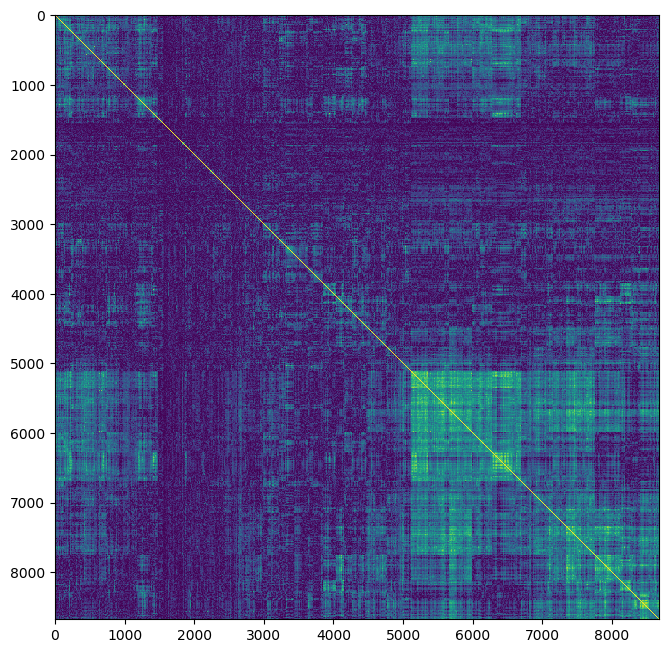

In [193]:
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov),no_plot=True)['ivl'], dtype=int)
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov[order, :][:, order])
plt.show()

In [21]:
filtered_cov_high_var = []
for i in range(len(high_var_train_genes.columns)):
    row = []
    for j in range(len(high_var_train_genes.columns)):
        if cov[i][j] > 0.70 and i != j:
            row.append(j)
    filtered_cov_high_var.append(row)

In [22]:
filtered = []
for i in range(len(filtered_cov_high_var)):
    if len(filtered_cov_high_var[i]) > 0:
        filtered.append(i)

In [23]:
to_remove = []
to_keep = []
for gene in filtered:
    # The gene is not correlated to anything we've seen so far
    if gene not in to_remove:
        # remove all values 
        vals = filtered_cov_high_var[gene]
        for val in vals:
            if val not in to_remove:
                to_remove.append(val)
        to_keep.append(gene)

#### Get the new filtered features

In [24]:
cols_filtered_high_var = [x for x in high_var_train_genes.columns if x not in to_remove]

In [25]:
high_var_train_genes = high_var_train_genes[cols_filtered_high_var]

### Batch Effects
- Do we have to worry about them?
- May have to do this high up in the process
#### Aimee's thoughts
- Since each sample was collected at a different time, I think there actually may not be batch effects-- actually, there are probably 325 batches so normalization probably took care of that
- I was also having a hard time finding methods of batch correction for when you don't know the batches beforehand, and that don't remove feature variables

## Unsupervised Machine Learning Method Analysis

In [89]:
def get_accuracy(true_labels, predicted_labels):
    accuracy = 0
    for i in range(len(true_labels)):
        if true_labels[i] == predicted_labels[i]:
            accuracy += 1
    return accuracy/len(true_labels)

In [146]:
# Map Labels
label_mapping = {'WHO II': 0, 'WHO III': 1, 'WHO IV': 2}
reverse_mapping = {0: 'WHO II', 1: 'WHO III', 2: 'WHO IV'}
mapped_labels_train = [label_mapping[x[0]] for x in train_lbl]
mapped_labels_test = [label_mapping[x[0]] for x in test_lbl]

### Transform Testing Data

In [26]:
# Remove low expressed genes
test_genes = test_genes[cols_filtered_low_exp]
# Normalize using TMM
normalized_tmm_test_genes = gmn.tmm_normalization(test_genes.T).T
normalized_tmm_test_genes.head()
# Apply log transform
log_normalized_tmm_test_genes = pd.DataFrame(np.log2(normalized_tmm_test_genes, out=np.zeros_like(normalized_tmm_test_genes), where=(normalized_tmm_test_genes!=0)))
log_normalized_tmm_test_genes.columns = gene_indices
# Remove low expressed genes and correlated genes

# Get the features in high_var_train_genes
high_var_gene_indices = list(high_var_train_genes.columns) 
cols_filtered = [x for x in log_normalized_tmm_test_genes.columns if x in high_var_gene_indices]
high_var_processed_test_genes = log_normalized_tmm_test_genes[cols_filtered]

## Save the processed train and test genes as well as ground truth labels

In [32]:
high_var_processed_test_genes.to_csv('test_data_processed.csv', index=False)
high_var_train_genes.to_csv('train_data_processed.csv', index=False)

In [33]:
np.save('test_labels.csv', test_lbl)
np.save('train_labels.csv', train_lbl)

### BIRCH - Agglomerative Hierarchical Clustering Technique
- Follows general structure of agglomerative clustering (gradually building clusters by combining smaller clusters)
- Optimized for larger datasets and (seems to) work well for multi-dimensional data
- Uses Clustering Feature (CF) and Clustering Feature Tree (CF-tree). CF is used to describe the features of clusters and the CF-tree is used to describe the clustering situation of the whole data
- Requires sphericial data as based on distance metrics 
- Hierarchial generally shown to be better for larger dimensions

### Birch Algorithm
- First pass through the data to produce rough clusters
- Second pass through the data to fix everything by taking the centroids of these clusters and only working with these
- Go through the data agin and reassign each data point to the closest centroid

In [169]:
birch_cluster = Birch(n_clusters=3, branching_factor=50)
birch_cluster.fit(high_var_train_genes)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

In [170]:
get_accuracy(mapped_labels_train, birch_cluster.labels_)

0.5993150684931506

During Phase 4 of the algorithm, can use the centroids of the clusters as seeds and then predict the labels of the points by identifying the closest centroid

In [171]:
results = birch_cluster.predict(high_var_processed_test_genes)
get_accuracy(mapped_labels_test, results)

0.6060606060606061

### Trying PCA prior to clustering

In [188]:
# PCA before clustering; reducing from 8000+ features to 100
high_scaler = StandardScaler()
high_var_train_genes_scaled = high_scaler.fit_transform(high_var_train_genes)
pca = PCA(n_components=100)
transformed_data = pca.fit_transform(high_var_train_genes_scaled)
birch_cluster_pca = Birch(n_clusters=3, branching_factor=50)
birch_cluster_pca.fit(transformed_data)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

In [189]:
get_accuracy(mapped_labels_train, birch_cluster_pca.labels_)

0.6061643835616438

In [190]:
high_var_test_genes_scaled = high_scaler.transform(high_var_processed_test_genes)
transformed_data_test = pca.transform(high_var_test_genes_scaled)
results_pca = birch_cluster_pca.predict(transformed_data_test)
get_accuracy(mapped_labels_test, results_pca)

0.6060606060606061

In [242]:
top_pcs = pd.DataFrame((abs(pca.components_)))

In [254]:
print(f'Explained variance in PCS: {pca.explained_variance_ratio_[0:10]}')

Explained variance in PCS: [0.19040518 0.0951259  0.05433168 0.04888226 0.0317941  0.02383734
 0.02322102 0.01937901 0.0181771  0.0152034 ]


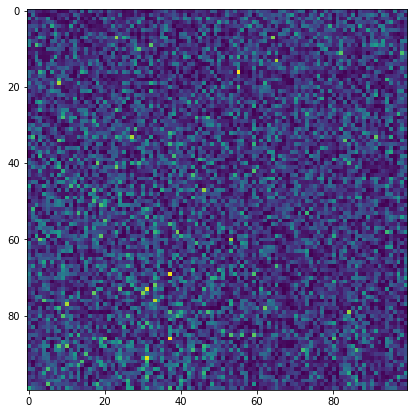

In [251]:
pcs_infl = np.array(hierarchy.dendrogram(hierarchy.ward(top_pcs), no_plot=True)['ivl'], dtype=int)
fig = plt.figure(figsize=(7, 7))
plt.imshow(top_pcs[pcs_infl])
plt.show()

- Needed 100 components to explain at least 80% of the variance in the data
- Visually, no one gene had a significant impact on all the PCs and the greatest variance captures by the first PC was only 0.19 

### Comparing the different Visualization Methods:
- PCA and t-SNE can both be used to visualize higher dimensional data and the clusters formed
- PCA is deterministic and tries to preserve global properties while t-SNE places neighbors next to
    each other and ignores global structures
- Selecting different values for perplexity can alter data visualization

In [129]:
def display_pca(input_data, labels, title):
    high_scaler = StandardScaler()
    input_scaled = high_scaler.fit_transform(input_data)
    
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(input_scaled)
    
    data_df = pd.DataFrame(data = transformed_data, columns = ['principal component 1', 'principal component 2'])
    class_labels_df = pd.DataFrame(labels)
    data_df = pd.concat([data_df, class_labels_df], axis = 1)
    data_df.columns = ['PC1', 'PC2', 'Grade']
    
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(1,2,1) 
    ax.set_title(title, fontsize = 15)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    targets = ['WHO II', 'WHO III', 'WHO IV']
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = data_df['Grade'] == target
        ax.scatter(data_df.loc[indicesToKeep, 'PC1']
                   , data_df.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [137]:
def display_tsne(input_data, labels, title, perplexity=25):
    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
    X_2d = tsne.fit_transform(input_data)
    data_df = pd.DataFrame(data = X_2d)
    class_labels_df = pd.DataFrame(labels, columns=['Grade'])
    data_df = pd.concat([data_df, class_labels_df], axis = 1)
    
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(1,2,1) 
    ax.set_title(title, fontsize=15)
    targets = [0, 1, 2]
    targets = ['WHO II', 'WHO III', 'WHO IV']
    ax.set_xlabel('Dimension 1', fontsize = 15)
    ax.set_ylabel('Dimension 2', fontsize = 15)
    for target, color in zip(targets,colors):
        indicesToKeep = data_df['Grade'] == target
        ax.scatter(data_df.loc[indicesToKeep, 0],
                   data_df.loc[indicesToKeep, 1],
                   c=color, edgecolor='k')
    ax.legend(targets)
    ax.grid()

## Projection of Training Data onto 2 Components

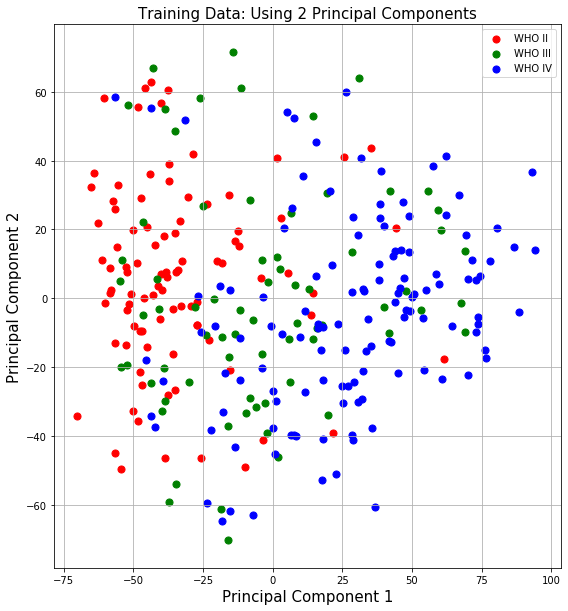

In [135]:
display_pca(high_var_train_genes, train_lbl, 'Training Data: Using 2 Principal Components')

## Visualize Training Data using t-SNE

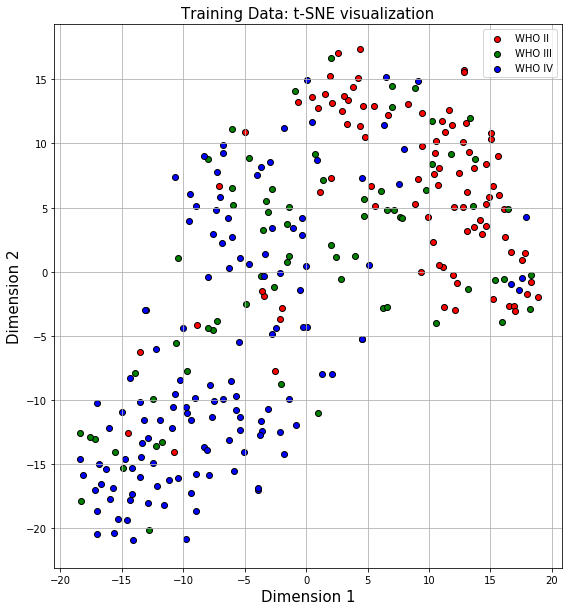

In [138]:
display_tsne(high_var_train_genes, train_lbl, 'Training Data: t-SNE visualization')

## Visualize BIRCH Clustering using PC (PCA just for visualizing)

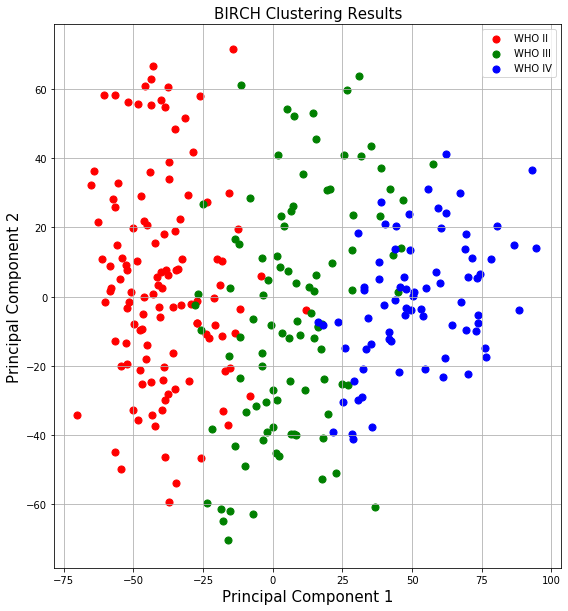

In [149]:
mapped_labels = [reverse_mapping[x] for x in birch_cluster.labels_]
display_pca(high_var_train_genes, mapped_labels, 'BIRCH Clustering Results')

## Visualize BIRCH Clustering using t-SNE (2-components)

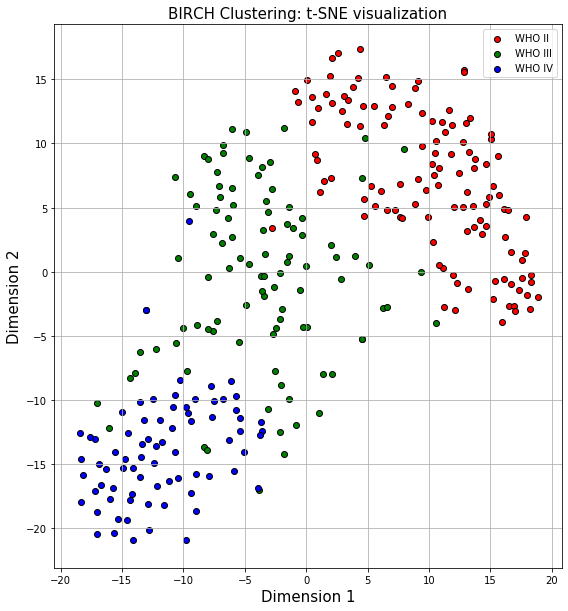

In [150]:
display_tsne(high_var_train_genes, mapped_labels, 'BIRCH Clustering: t-SNE visualization')

## Visualize Clustering Results after using only 100 components

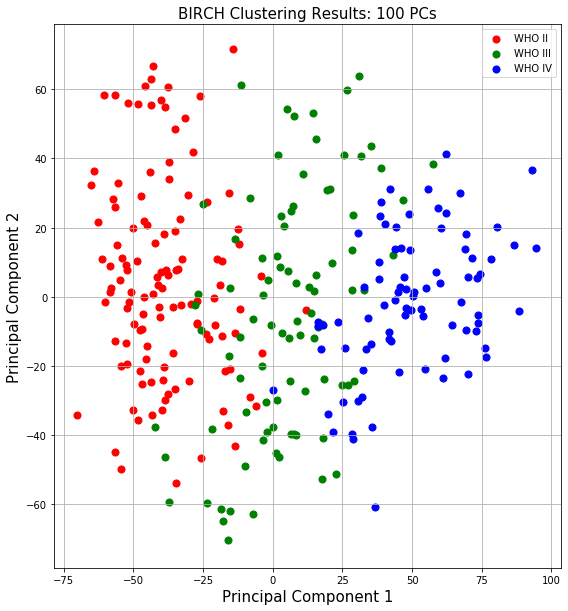

In [151]:
mapped_labels = [reverse_mapping[x] for x in birch_cluster_pca.labels_]
display_pca(high_var_train_genes, mapped_labels, 'BIRCH Clustering Results: 100 PCs')

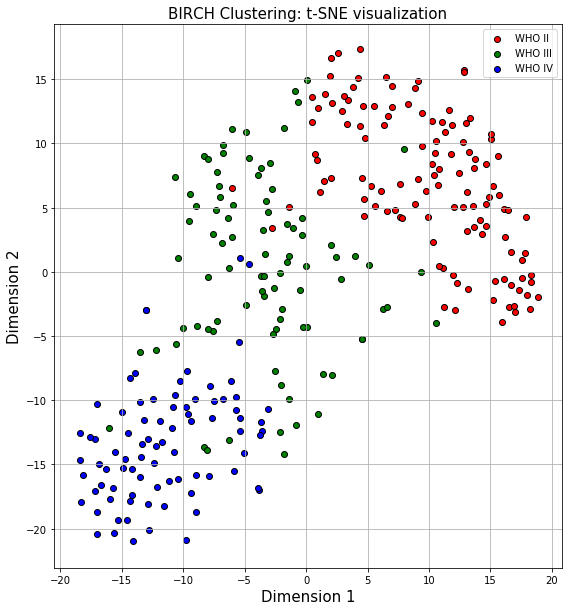

In [152]:
mapped_labels = [reverse_mapping[x] for x in birch_cluster_pca.labels_]
display_tsne(high_var_train_genes, mapped_labels, 'BIRCH Clustering: t-SNE visualization')

## Testing Set

In [110]:
# Visualize high dimensionality using PCA (should we do PCA first then cluster?)
high_scaler = StandardScaler()
high_var_train_genes_scaled = high_scaler.fit_transform(high_var_train_genes)
high_var_test_genes_scaled = high_scaler.transform(high_var_processed_test_genes)
transformed_data = pca.fit_transform(high_var_train_genes_scaled)
transformed_data_test = pca.transform(high_var_test_genes_scaled) 

In [111]:
training_plot = pd.DataFrame(data = transformed_data, columns = ['principal component 1', 'principal component 2'])
testing_plot = pd.DataFrame(data = transformed_data_test, columns = ['principal component 1', 'principal component 2'])
class_labels_df_train = pd.DataFrame(birch_cluster.labels_)
class_labels_df_test = pd.DataFrame(results_pca)
training_df = pd.concat([training_plot, class_labels_df_train], axis = 1)
training_df.columns = ['PC1', 'PC2', 'Grade']
testing_df = pd.concat([testing_plot, class_labels_df_test], axis = 1)
testing_df.columns = ['PC1', 'PC2', 'Grade']

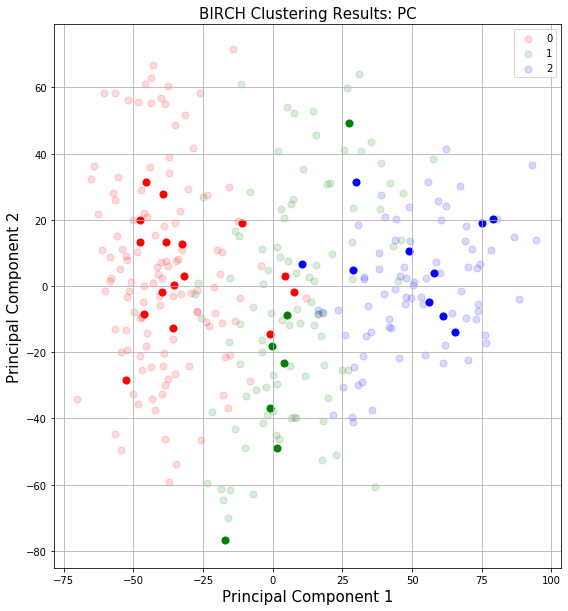

In [115]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('BIRCH Clustering Results: PC', fontsize=15)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = training_df['Grade'] == target
    ax.scatter(training_df.loc[indicesToKeep, 'PC1']
               , training_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50, alpha = 0.15)
for target, color in zip(targets,colors):
    indicesToKeep = testing_df['Grade'] == target
    ax.scatter(testing_df.loc[indicesToKeep, 'PC1']
               , testing_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()